In [171]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import argparse
import numpy as np
import cv2
import matplotlib.gridspec as gridspec
import glob
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image
from matplotlib import cm
from matplotlib import colors
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

import scipy.stats
from sklearn import mixture

import pandas as pd

# Clustering a half-ripe fruit

In [167]:
def plot(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, interpolation='nearest')

In [191]:
a = np.array([[40, 10], [50, 11]])
a
a.mean(axis=0)

array([45. , 10.5])

In [172]:
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(hr_rgb_re)
colors = norm(hr_rgb_re).tolist()

In [162]:
print(hr_rgb.shape)

(49, 63, 3)


In [181]:
def RGB(red,green,blue): return '#%02x%02x%02x' % (red,green,blue)

In [182]:
def colorPixels(img):
    img = cv2.imread(img) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    return pixel_colors

In [183]:
def GMM_Cluster_Prob(imgData, clusters):
    
    gmm_ = GaussianMixture(n_components = clusters)
    labels = gmm_.fit_predict(imgData)
    
    centers = np.empty(shape=(gmm_.n_components, imgData.shape[1]))
    
    for i in range(gmm_.n_components):
        density = scipy.stats.multivariate_normal(cov=gmm_.covariances_[i], mean=gmm_.means_[i]).logpdf(imgData)
        centers[i, :] = imgData[np.argmax(density)]
    
    #print("Posterior probability of data belongingness to each Gaussian")  
    probs = gmm_.predict_proba(imgData)
    probs = probs.round(3)
    
    return labels, centers, probs

(3087, 3)


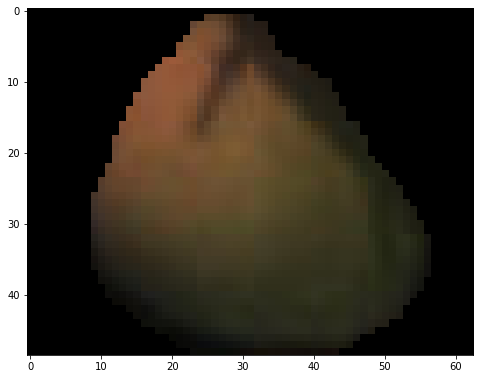

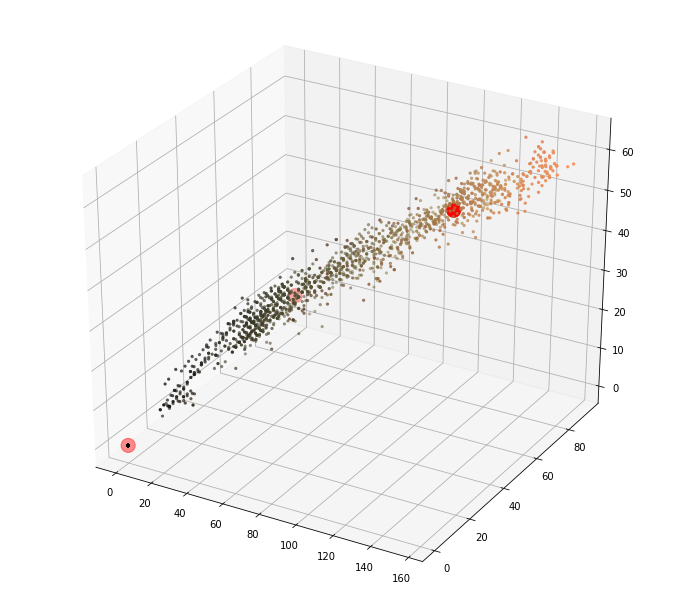

In [209]:
from matplotlib import colors

imagePath = "testImage.png"

colors_ = colorPixels(imagePath)

mng_img = cv2.imread(imagePath)
mng_img = cv2.cvtColor(mng_img, cv2.COLOR_BGR2RGB)

plot(mng_img)

mng_img_re = mng_img.reshape((mng_img.shape[0] * mng_img.shape[1], 3))

image_df = pd.DataFrame(mng_img_re) 
#print(image_df.head())

clusters = 3

labels, centers, probs = GMM_Cluster_Prob(mng_img_re, clusters)

image_df['Cluster Labels']= labels 

print(probs.shape)

fig2 = plt.figure(figsize = (12, 50))

axis = fig2.add_subplot(4, 1, 1, projection="3d")
axis.scatter(mng_img_re[:, 0], mng_img_re[:, 1], mng_img_re[:, 2], facecolors= colors_, marker=".")
axis.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker="o", facecolor ='RED',  s = 200)

plt.show()

In [211]:
image_newdf = pd.DataFrame()
sortedLabels = sorted(image_df['Cluster Labels'].unique())
for label in sortedLabels:
    d = image_df[image_df['Cluster Labels'] == label]
    count = d[0].count()
    temp = pd.DataFrame(
        {
            'Cluster Labels': label,
            '#Pixels': count,
            'Mean R' : int(d[0].mean()),
            'Mean G' : int(d[1].mean()),
            'Mean B' : int(d[2].mean())
        }, index=[0]
    )
    image_newdf = pd.concat([image_newdf, temp])

print(image_newdf) 

   Cluster Labels  #Pixels  Mean R  Mean G  Mean B
0               0     1445       0       0       0
0               1      668     105      75      45
0               2      974      44      41      26


In [212]:
print(probs)
f = probs.mean(axis = 0)
print(f)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[0.468092   0.22087075 0.31103725]


['#000000', '#694b2d', '#2c291a']


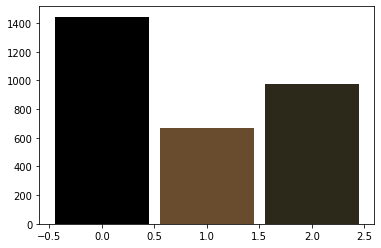

In [213]:
clusters = image_newdf["Cluster Labels"].tolist()  
count    = image_newdf["#Pixels"].tolist()  
colors   = [ RGB(r, g, b) for r, g, b in zip(image_newdf["Mean R"], image_newdf["Mean G"], image_newdf["Mean B"]) ]

print(colors)

width = 0.90
fig, ax = plt.subplots()
a = ax.bar(clusters, count, width, color = colors) # plot a vals

plt.show() 

In [2]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [4]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

In [26]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    plt.imshow(image, interpolation = 'nearest')

# Clusters are 3 to accommodate Black Mask, Green and Red patches

## Ripe, Unripe, and Semi ripe fruits are clustered in 4 color spaces.


In [6]:
def showClusters(path):
    
    colorSpace = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YCrCb, cv2.COLOR_BGR2HSV]
    cs_string = ["RGB", "LAB", "YCrCb", "HSV"]
    num = 1
    for cs in colorSpace:
        
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cs)
        #image = cv2.GaussianBlur(image, (7, 7), 0)
        
        sp1 = int(str(num) + "2" + "1")
        sp2 = int(str(num) + "2" + "2")
        #print(sp1, sp2, num)
        
        fig = plt.figure(figsize=(15,15))
        plt.subplot(sp1) # 121 : row, column, image_number
        plt.title(cs_string[num - 1])
        plt.imshow(image, interpolation='nearest')
        
        image = image.reshape((image.shape[0] * image.shape[1], 3))
        
        clt = KMeans(n_clusters = 3)
        labels = clt.fit_predict(image)
        #clt.fit(image) 
        
        
        centers = clt.cluster_centers_
        radii = [cdist(image[labels == i], [center]).max()
             for i, center in enumerate(centers)]
        print(radii)
        
        ax =  plt.gca()
        
        '''for c, r in zip(centers, radii):
            ax.add_patch(plt.Circle(c, r, fc='red', lw=3, alpha=0.5, zorder=1))'''
        
        hist = centroid_histogram(clt)
        bar = plot_colors(hist, clt.cluster_centers_)
        
        plt.subplot(sp2) # 122 : row, column, image_number
        plt.title('Dominant Clusters')
        plt.imshow(bar)
        
        num = num + 1
        plt.show()
    

# Ripen Mango

In [127]:
os.chdir("msk_ripen")
#path = "msk_ripen/*.png"
#newList = glob.glob("*.png")
#print(newList)
#showClusters(newList[6])
os.chdir("..")
%pwd

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

# Raw Mango

In [126]:
os.chdir("msk_unripen")
#path = "msk_ripen/*.png"
#newList = glob.glob("*.png")
#print(newList)
#showClusters(newList[1])
os.chdir("..")
%pwd

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

# Semi Ripe Mango

In [125]:
os.chdir("msk_semi")
#path = "msk_ripen/*.png"
#newList = glob.glob("*.jpg")
#print(newList)
#showClusters(newList[0])
os.chdir("..")
%pwd

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [124]:
%pwd
os.chdir("msk_ripen")
#showClusters("img_1_3_0_Mangos_output.png")
os.chdir("..")

# 3D Scatter Plot 

In [25]:
def colorPixels(img):
    img = cv2.imread(img) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    return pixel_colors
    

In [26]:
def showScatterPlot(imgPath, colors):
    
    colorSpace = [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YCrCb, cv2.COLOR_BGR2HSV]
    cs_string = ["R G B", "L A B", "Y Cr Cb", "H S V"]
    num = 1
    
    for cs in colorSpace:
        
        mng = cv2.imread(imgPath)
        mng = cv2.cvtColor(mng, cs)
        
        #show(mng)
        r, g, b = cv2.split(mng)
        fig = plt.figure(figsize = (15, 50))
        axis = fig.add_subplot(4, 1, num, projection="3d")
        #fig.add_subplot(4, 1, num, projection="3d")
        
        axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors= colors, marker="o")
        labelList = cs_string[num - 1].split()
        axis.set_xlabel(labelList[0])
        axis.set_ylabel(labelList[1])
        axis.set_zlabel(labelList[2])
        plt.show()
        
        num = num + 1

# Raw Mango - Scatterplot

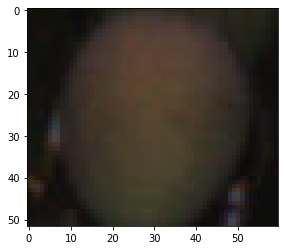

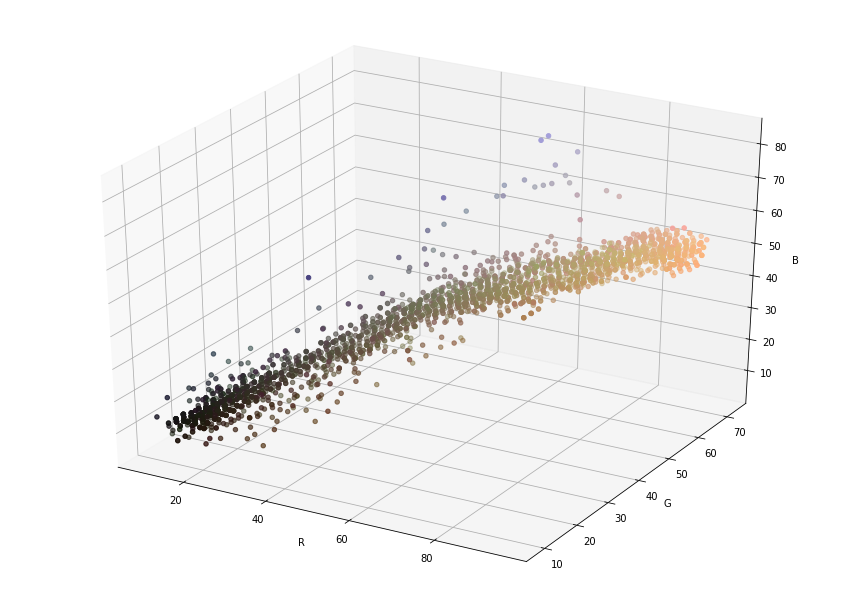

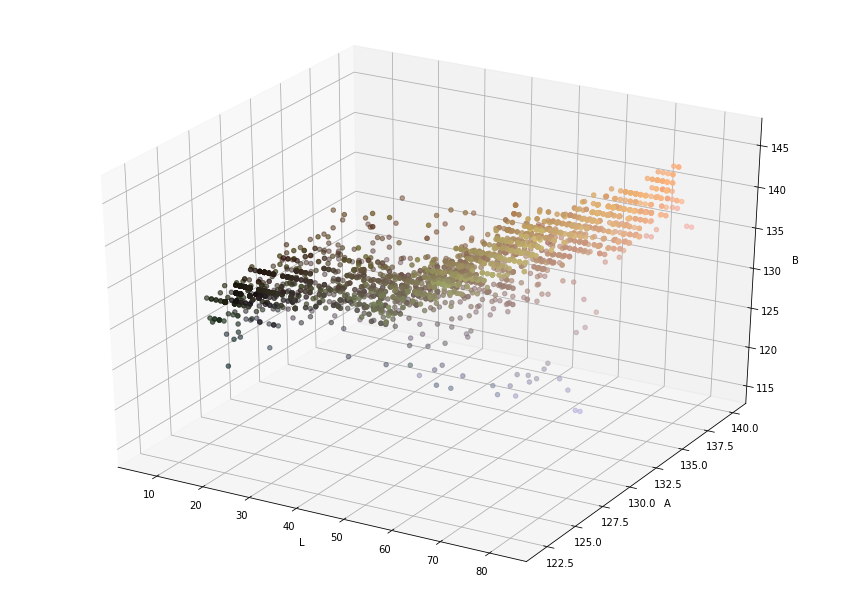

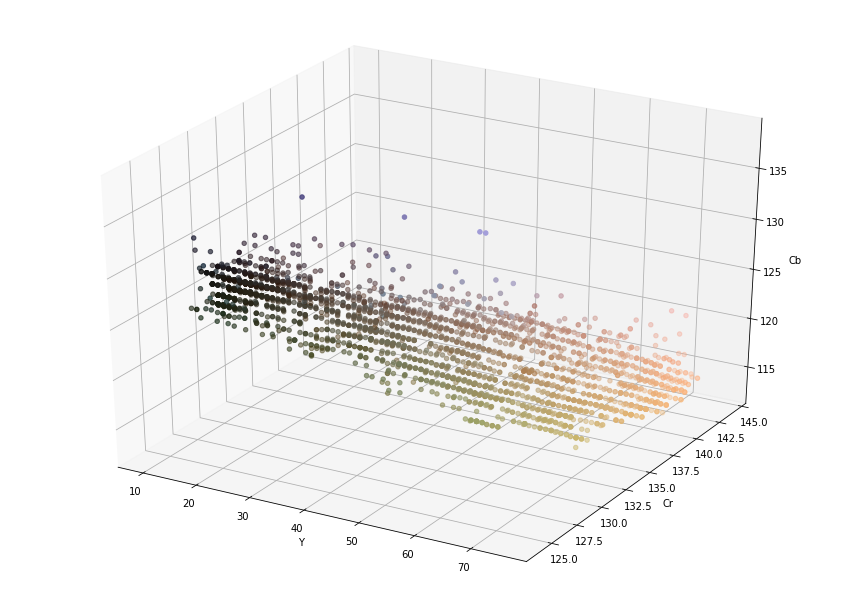

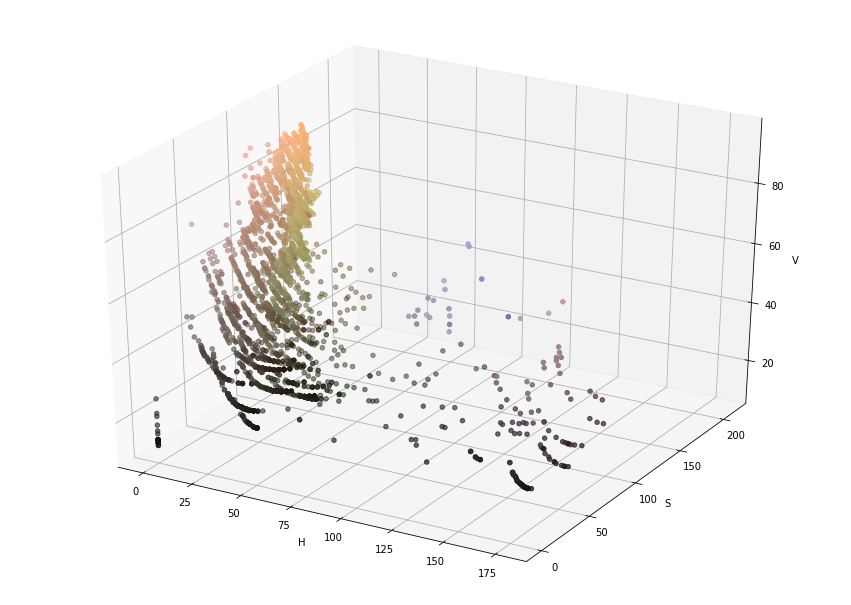

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [27]:
folder = "UnRipe"
image = "img_1_8_0_Mangos(7).jpg"

os.chdir(folder)

pixels_color = colorPixels(image)
showScatterPlot(image, pixels_color)

os.chdir("..")
%pwd

# Ripe Fruit - Scatter plot

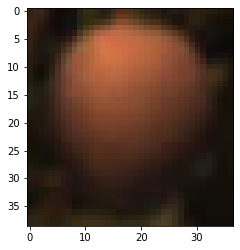

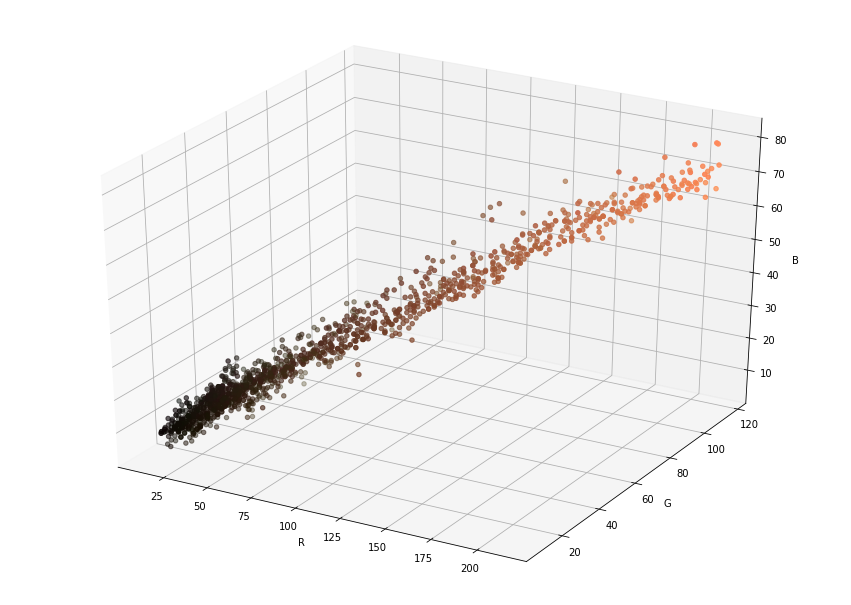

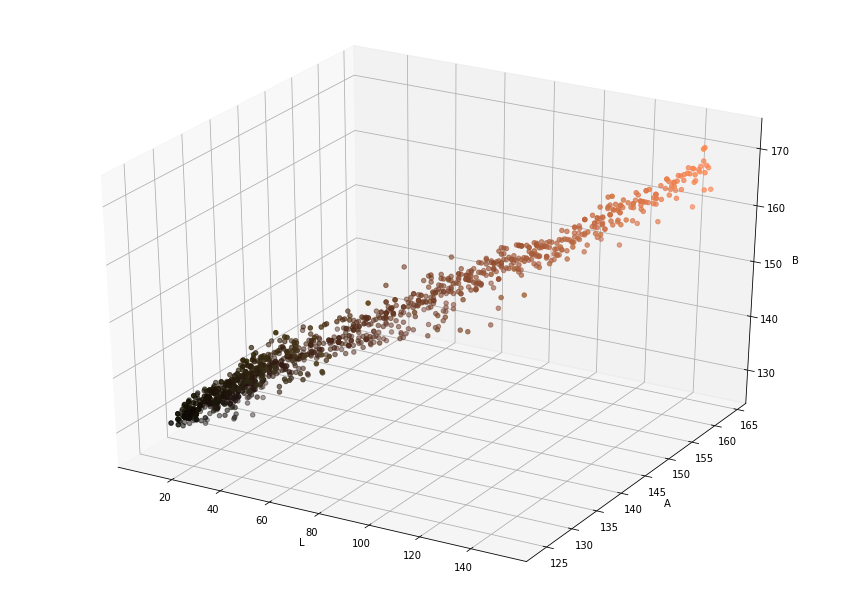

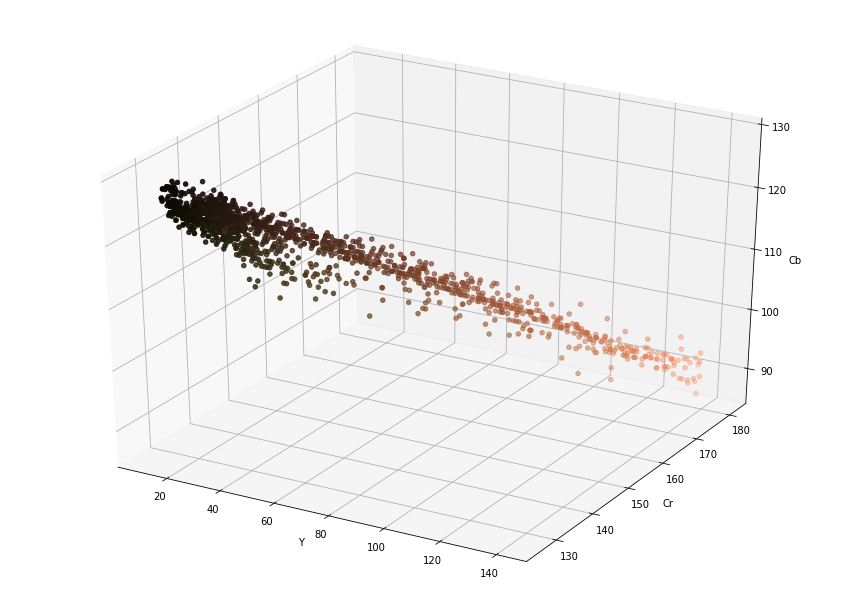

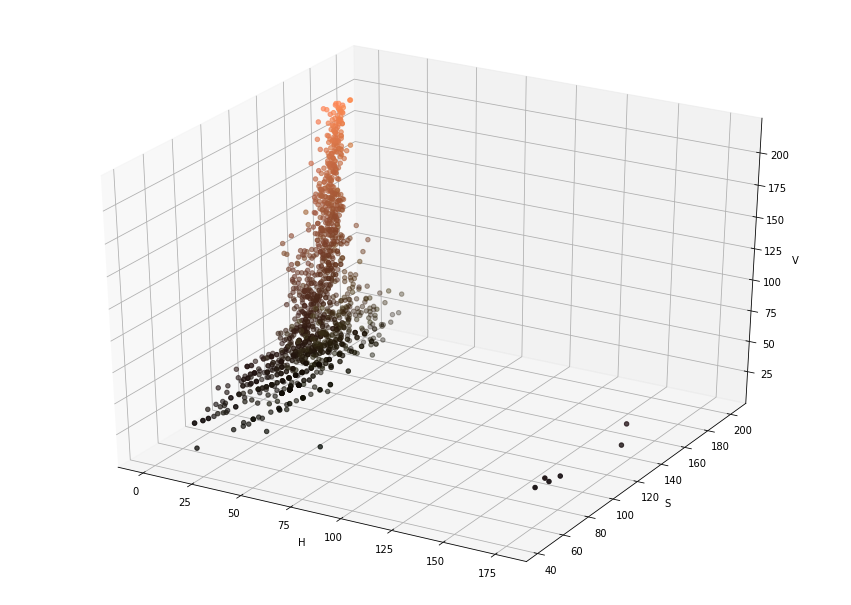

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [50]:
folder = "Ripen"
image = "img_1_10_0_Mangos.jpg (1).jpg"

os.chdir(folder)

#mask = cv2.inRange(image, light_orange, dark_orange)

pixels_color = colorPixels(image)
showScatterPlot(image, pixels_color)

os.chdir("..")
%pwd

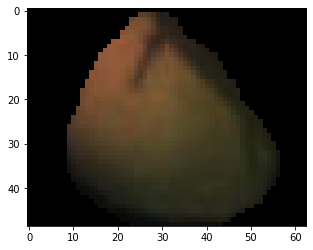

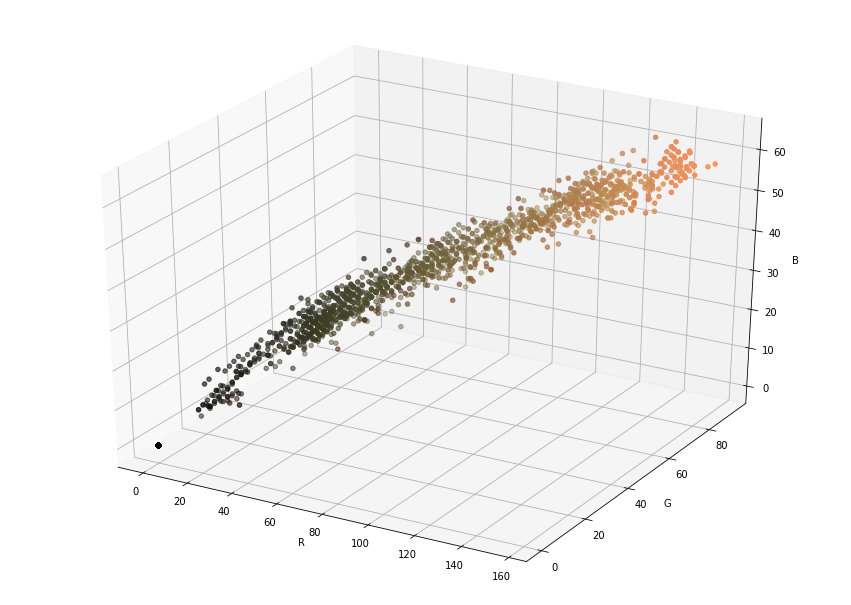

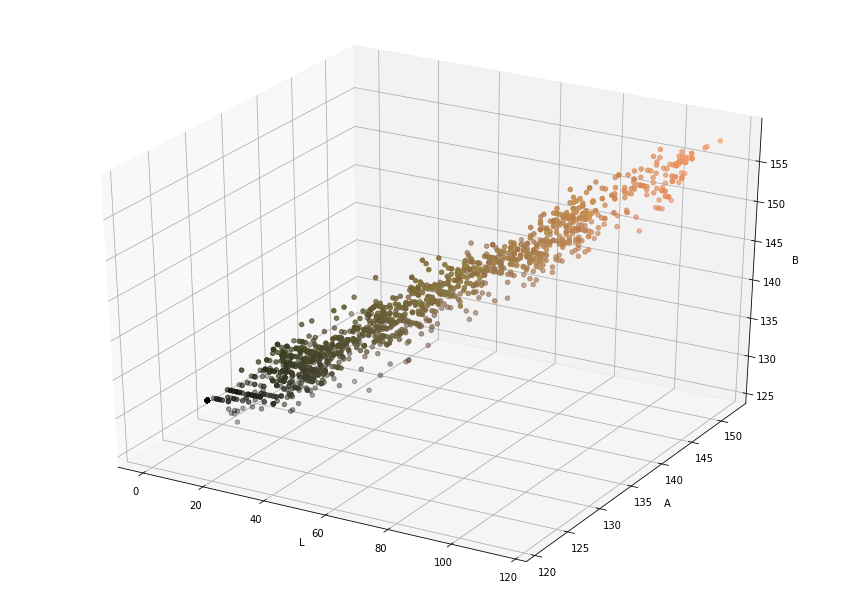

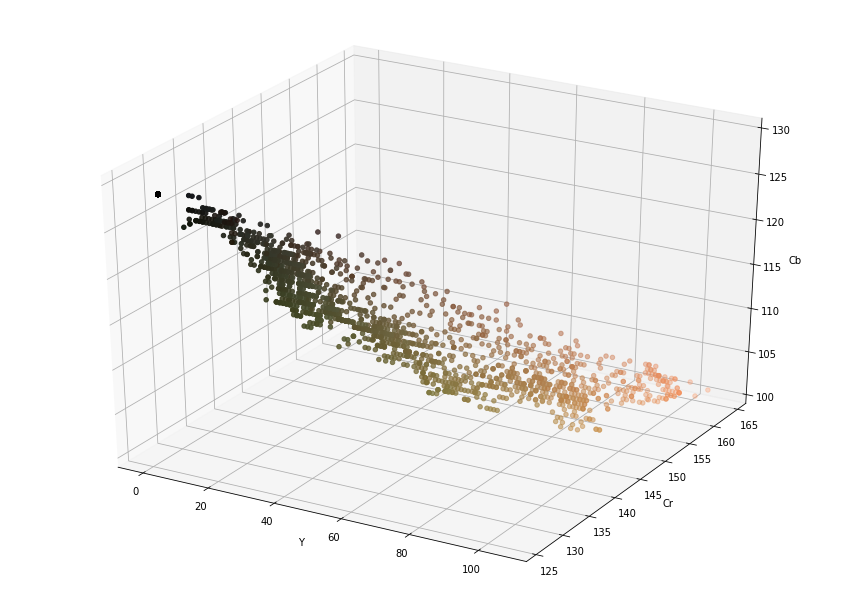

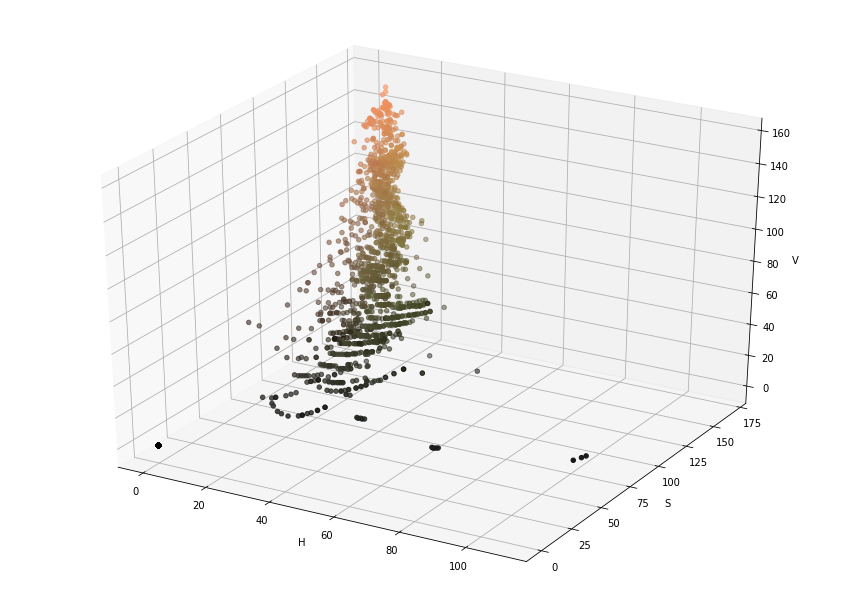

In [22]:
pixels_color = colorPixels("testImage.png")
showScatterPlot("testImage.png", pixels_color)

# Gaussian Mixture Model Clustering

In [145]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    print(2 * np.sqrt(covariance))
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

# Raw Mango Clusters- GMM

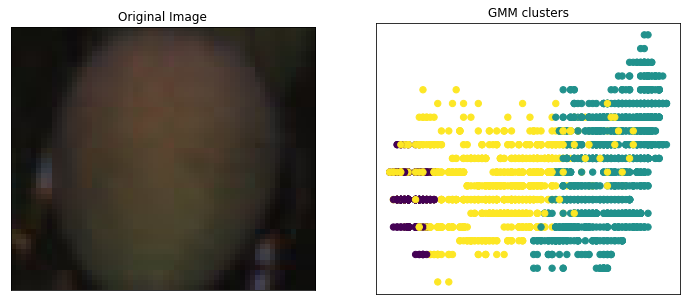

Posterior probability of data belongingness to each Gaussian
[[0.985 0.    0.015]
 [0.985 0.    0.015]
 [0.992 0.    0.008]
 ...
 [0.935 0.    0.065]
 [0.935 0.    0.065]
 [0.935 0.    0.065]]


'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [122]:
folder = "UnRipe"
imagePath = "img_1_8_0_Mangos(7).jpg"

os.chdir(folder)

image = cv2.imread(imagePath)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
 
gmm = GaussianMixture(n_components=3).fit(image)
labels = gmm.predict(image)

fig2 = plt.figure(figsize = (12, 5))
plt.subplot(121),plt.imshow(image_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.scatter(image[:, 0], image[:, 1], c=labels, s=40, cmap='viridis');
plt.title('GMM clusters'), plt.xticks([]), plt.yticks([])

plt.show()

print("Posterior probability of data belongingness to each Gaussian") # But still unsure about its correctness.
probs = gmm.predict_proba(image)
print(probs.round(3))

os.chdir("..")
%pwd

# Ripe Mango Clusters- GMM

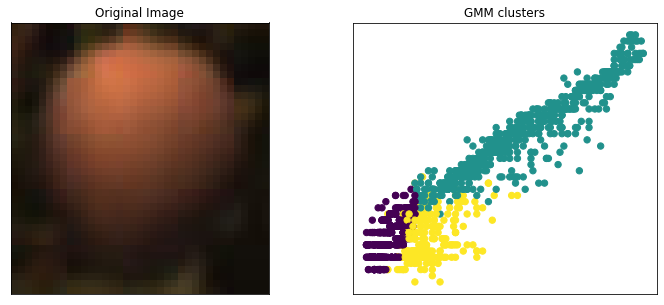

Posterior probability of data belongingness to each Gaussian
[[0.009 0.002 0.989]
 [0.005 0.01  0.985]
 [0.    0.405 0.595]
 ...
 [0.979 0.007 0.014]
 [0.979 0.007 0.014]
 [0.979 0.007 0.014]]


'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [123]:
folder = "Ripen"
imagePath = "img_1_10_0_Mangos.jpg (1).jpg"

os.chdir(folder)

image = cv2.imread(imagePath)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
 
gmm = GaussianMixture(n_components=3).fit(image)
labels = gmm.predict(image)

fig2 = plt.figure(figsize = (12, 5))
plt.subplot(121),plt.imshow(image_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.scatter(image[:, 0], image[:, 1], c=labels, s=40, cmap='viridis');
plt.title('GMM clusters'), plt.xticks([]), plt.yticks([])

plt.show()

print("Posterior probability of data belongingness to each Gaussian") # But still unsure about its correctness.
probs = gmm.predict_proba(image)
print(probs.round(3))

os.chdir("..")
%pwd

# Edge Detection

In [4]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

(39, 37, 3)


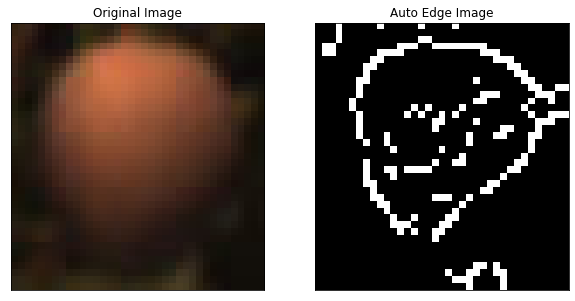

'/Users/pavankumar/Documents/Robotics MSc/Dissertation/Fruit-Detection-in-Orchards/Ripeness Analysis'

In [8]:
folder = "Ripen" 
imagePath = "img_1_10_0_Mangos.jpg (1).jpg"
#imagePath = "nemo0.jpg" 
os.chdir(folder)

image = cv2.imread(imagePath) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

print(image_rgb.shape)

fig2 = plt.figure(figsize = (10,10))
plt.subplot(121),plt.imshow(image_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(auto, cmap = "gray")
plt.title('Auto Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

os.chdir("..")
%pwd